In [ ]:
# ===========================
# Investigating the Removal of Cadmium from Water through UiO-66 Derivatives using Molecular Dynamics
# =========================== 
# 📊 Percent Removal Plots

# Table of Contents
# 1️⃣ Compiled Percent Removal vs. Time (exploratory code, not part of manuscript)
# 2️⃣ Percent Removal vs. Time (H, OH, COOH)
# 4️⃣ Percent Removal of Water

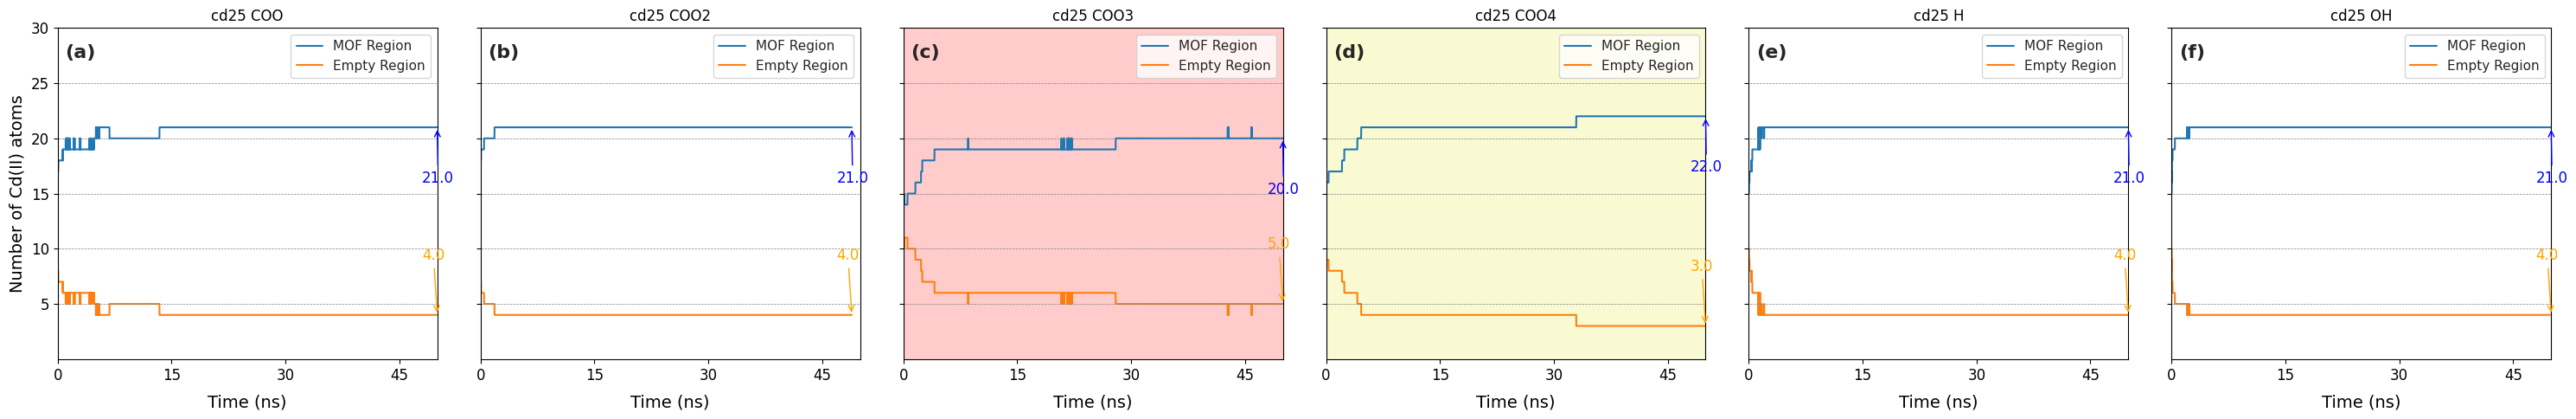

Figure saved to /home/josephzc/21Sept2024_data/0_fig/fig_count_25.png


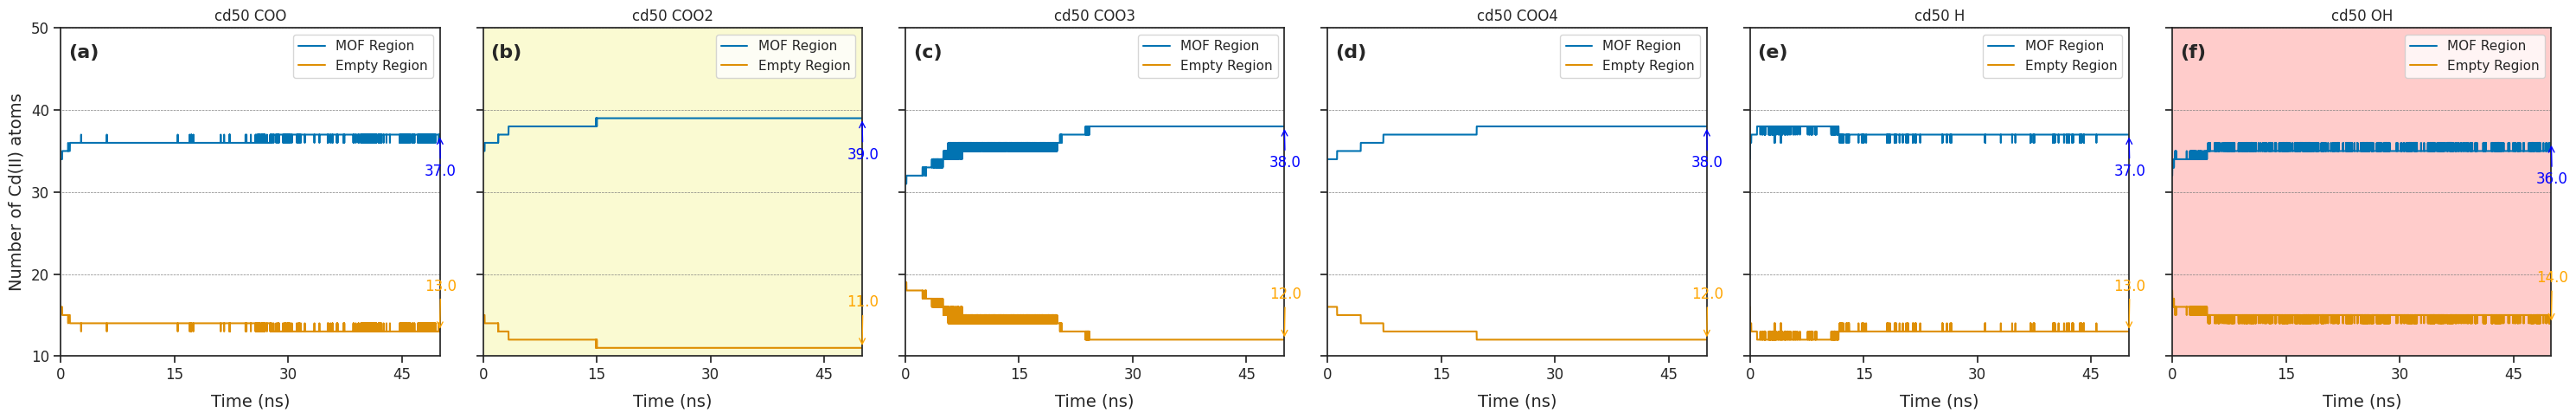

Figure saved to /home/josephzc/21Sept2024_data/0_fig/fig_count_50.png


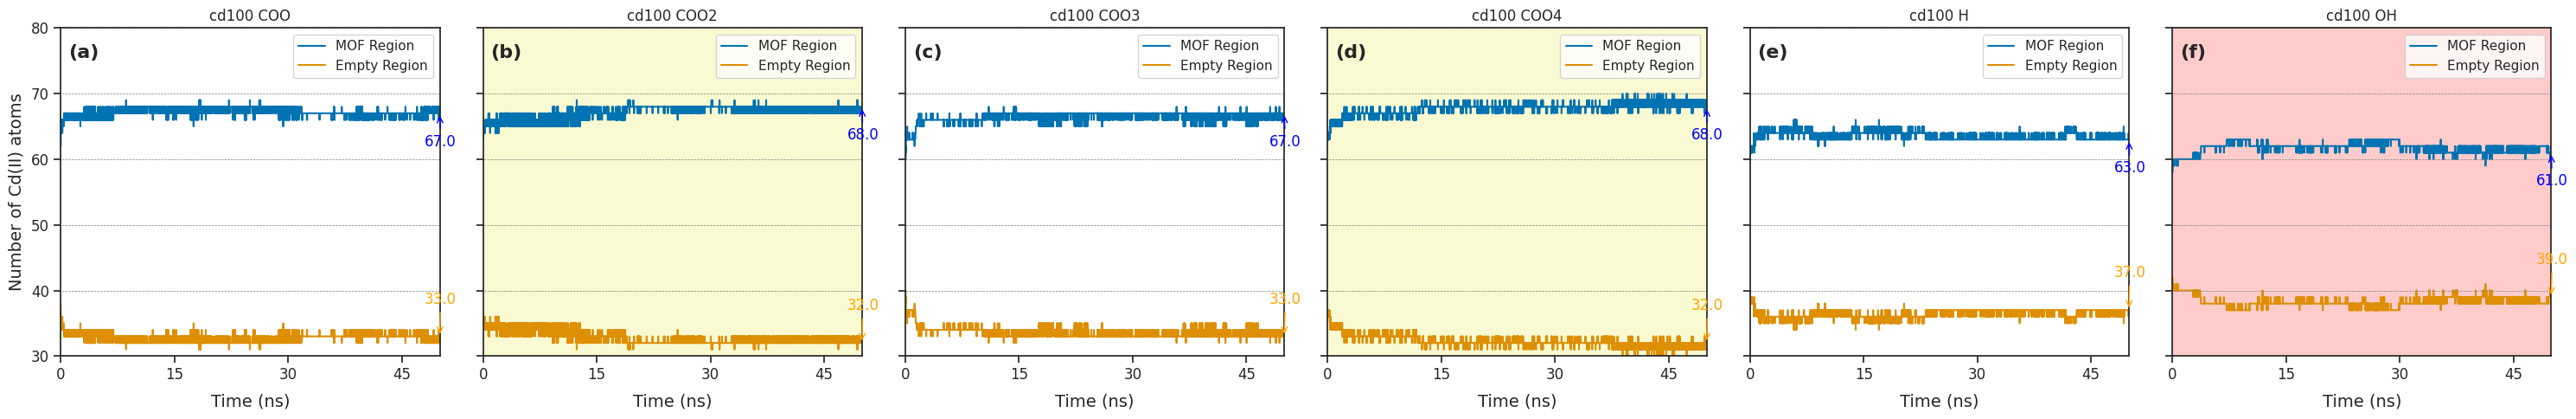

Figure saved to /home/josephzc/21Sept2024_data/0_fig/fig_count_100.png


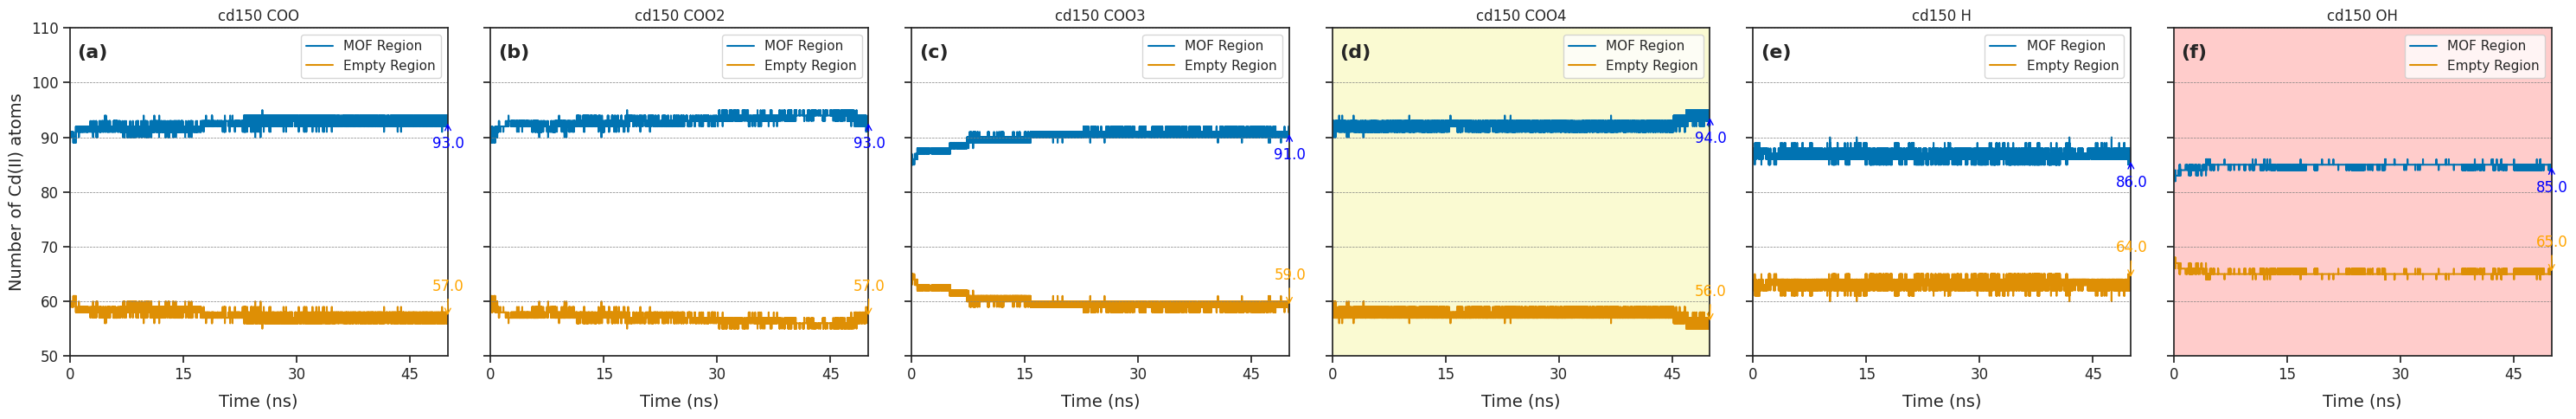

Figure saved to /home/josephzc/21Sept2024_data/0_fig/fig_count_150.png


In [1]:
# ============================
# 1️⃣ Compiled Percent Removal vs. Time (exploratory code, not part of manuscript)
# =========================== 
# 📅 Date Created: Sept 23, 2024
# 📅 Date updated: Oct 23, 2024
# - saves to a specific directory

import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import os  # Import os to handle file paths

def read_and_plot(cd_number, y_min=20, y_max=60, yticks=[35, 45, 55, 65], filename="fig_count.png", output_dir="."):
    # Find all files that match the pattern cd<number>_*.txt
    file_pattern = f"cd{cd_number}_*.txt"
    files = glob.glob(file_pattern)

    if not files:
        print(f"No files found for cd{cd_number}.")
        return

    # Adjust parse_filename to include 'H' as a group
    def parse_filename(filename):
        match = re.match(r"cd\d+_uio66-(COO|OH|H)(\d?)_merged_rep_dyn\.txt", filename)
        if match:
            group, number = match.groups()
            number = int(number) if number else 1  # Default number is 1 if not specified
            return group, number
        return None

    # Initialize sorted_files with the keys we need
    sorted_files = {
        'COO': [],
        'COO2': [],
        'COO3': [],
        'COO4': [],
        'H': [],
        'OH': [],
    }

    for file in files:
        parsed = parse_filename(file)
        if parsed:
            group, number = parsed
            key = f"{group}{number}" if number > 1 else group
            if key in sorted_files:
                # Store the file along with its group and number
                sorted_files[key].append((file, group, number))

    # Create ordered list of files with their group and number
    ordered_files = (
        sorted_files['COO'] +
        sorted_files['COO2'] +
        sorted_files['COO3'] +
        sorted_files['COO4'] +
        sorted_files['H'] +
        sorted_files['OH']
    )

    # Ensure we have enough files for plotting
    if len(ordered_files) < 6:
        print("Not enough files to plot.")
        return

    # Create subplots with shared x-axis and y-axis
    fig, axs = plt.subplots(1, 6, figsize=(30, 5), sharey=True)

    # Define y-axis limits and x-axis limits
    y_limits = (y_min, y_max)
    x_limits = (0, 50)

    # Set Seaborn theme
    sns.set_theme(style="ticks", palette="colorblind")

    # Labels for each plot
    labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

    # Initialize a list to store the last MOF Region values and axes
    last_mof_values = []

    # Plot for ordered files
    for i, (file, group, number) in enumerate(ordered_files[:6]):
        ax = axs[i]  # Since axs is now a 1D array
        try:
            df = pd.read_csv(file, delim_whitespace=True, header=0)
            # Convert 'step' column from femtoseconds to nanoseconds
            df.iloc[:, 0] = df.iloc[:, 0] / 1e6

            # Plot using seaborn's lineplot
            sns.lineplot(x=df.iloc[:, 0], y=df.iloc[:, 3], ax=ax, label="MOF Region")
            sns.lineplot(x=df.iloc[:, 0], y=df.iloc[:, 4], ax=ax, label="Empty Region")

            # Set the y-axis label only for the first plot
            if i == 0:
                ax.set_ylabel('Number of Cd(II) atoms', fontsize=14, labelpad=5)
            else:
                ax.set_ylabel('')  # No y-axis label for other plots

            ax.set_xlabel('Time (ns)', fontsize=14, labelpad=9)
            ax.legend()
            ax.set_ylim(y_limits)  # Set y-axis limits
            ax.set_xlim(x_limits)  # Set x-axis limits
            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.set_yticks(yticks)  # Set custom y-ticks

            # Set number of ticks to 4 on x-axis
            ax.xaxis.set_major_locator(MaxNLocator(4))

            # Draw horizontal broken lines extending outward from y-ticks
            y_ticks = ax.get_yticks()
            for y in y_ticks:
                ax.hlines(y, xmin=x_limits[0] - 2, xmax=x_limits[1] + 2, colors='gray', linestyles='--', lw=0.5)

            # Add the subplot label (a), (b), ..., (f)
            ax.text(0.02, 0.95, labels[i], transform=ax.transAxes,
                    fontsize=16, verticalalignment='top', fontweight='bold')

            # Create a title from the group and number
            title = f"cd{cd_number} {group}"
            if number > 1:
                title += str(number)
            ax.set_title(title, fontsize=12)

            # ======== Add Annotations to Last Data Points ========

            # Get the last data point for "MOF Region"
            x_last_mof = df.iloc[-1, 0]
            y_last_mof = df.iloc[-1, 3]

            # Annotate the last point of "MOF Region"
            ax.annotate(
                f"{y_last_mof:.1f}",  # Text to display
                xy=(x_last_mof, y_last_mof),  # Point to annotate
                xytext=(x_last_mof - 2, y_last_mof - 5),  # Text position
                arrowprops=dict(arrowstyle="->", color='blue'),
                fontsize=12,
                color='blue'
            )

            # Get the last data point for "Empty Region"
            x_last_empty = df.iloc[-1, 0]
            y_last_empty = df.iloc[-1, 4]

            # Annotate the last point of "Empty Region"
            ax.annotate(
                f"{y_last_empty:.1f}",
                xy=(x_last_empty, y_last_empty),
                xytext=(x_last_empty - 2, y_last_empty + 5),
                arrowprops=dict(arrowstyle="->", color='orange'),
                fontsize=12,
                color='orange'
            )

            # Store the last MOF Region value and axis
            last_mof_values.append((y_last_mof, ax))

            # =====================================================

        except Exception as e:
            print(f"Error reading file {file}: {e}")

    # ======== Highlight Subplots with Maximum MOF Region Value ========
    
    # Find the maximum last MOF Region value
    max_y_mof = max(value for value, ax in last_mof_values)

    # Highlight all subplots with the maximum value
    for value, ax in last_mof_values:
        if value == max_y_mof:
            ax.set_facecolor('lightgoldenrodyellow')
    
    # ======== Highlight Subplots with Minimum MOF Region Value ========

    # Find the minimum last MOF Region value
    min_y_mof = min(value for value, ax in last_mof_values)

    # Highlight all subplots with the minimum value
    for value, ax in last_mof_values:
        if value == min_y_mof:
            ax.set_facecolor('#FFCCCB')  # Light red color

    # ================================================================

    plt.tight_layout()

    # Save the figure with the provided filename in the specified output directory
    save_path = os.path.join(output_dir, filename)
    plt.show()
    fig.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Figure saved to {save_path}")


# Set your desired output directory
output_dir = '/home/josephzc/21Sept2024_data/0_fig/'  

# Script Activation
read_and_plot(25, 0, 30, yticks=[5, 10, 15, 20, 25, 30], filename="fig_count_25.png", output_dir=output_dir)
read_and_plot(50, 30, 50, yticks=[10, 20, 30, 40, 50], filename="fig_count_50.png", output_dir=output_dir)
read_and_plot(100, 30, 80, yticks=[30, 40, 50, 60, 70, 80], filename="fig_count_100.png", output_dir=output_dir)
read_and_plot(150, 50, 110, yticks=[50, 60, 70, 80, 90, 100, 110], filename="fig_count_150.png", output_dir=output_dir)


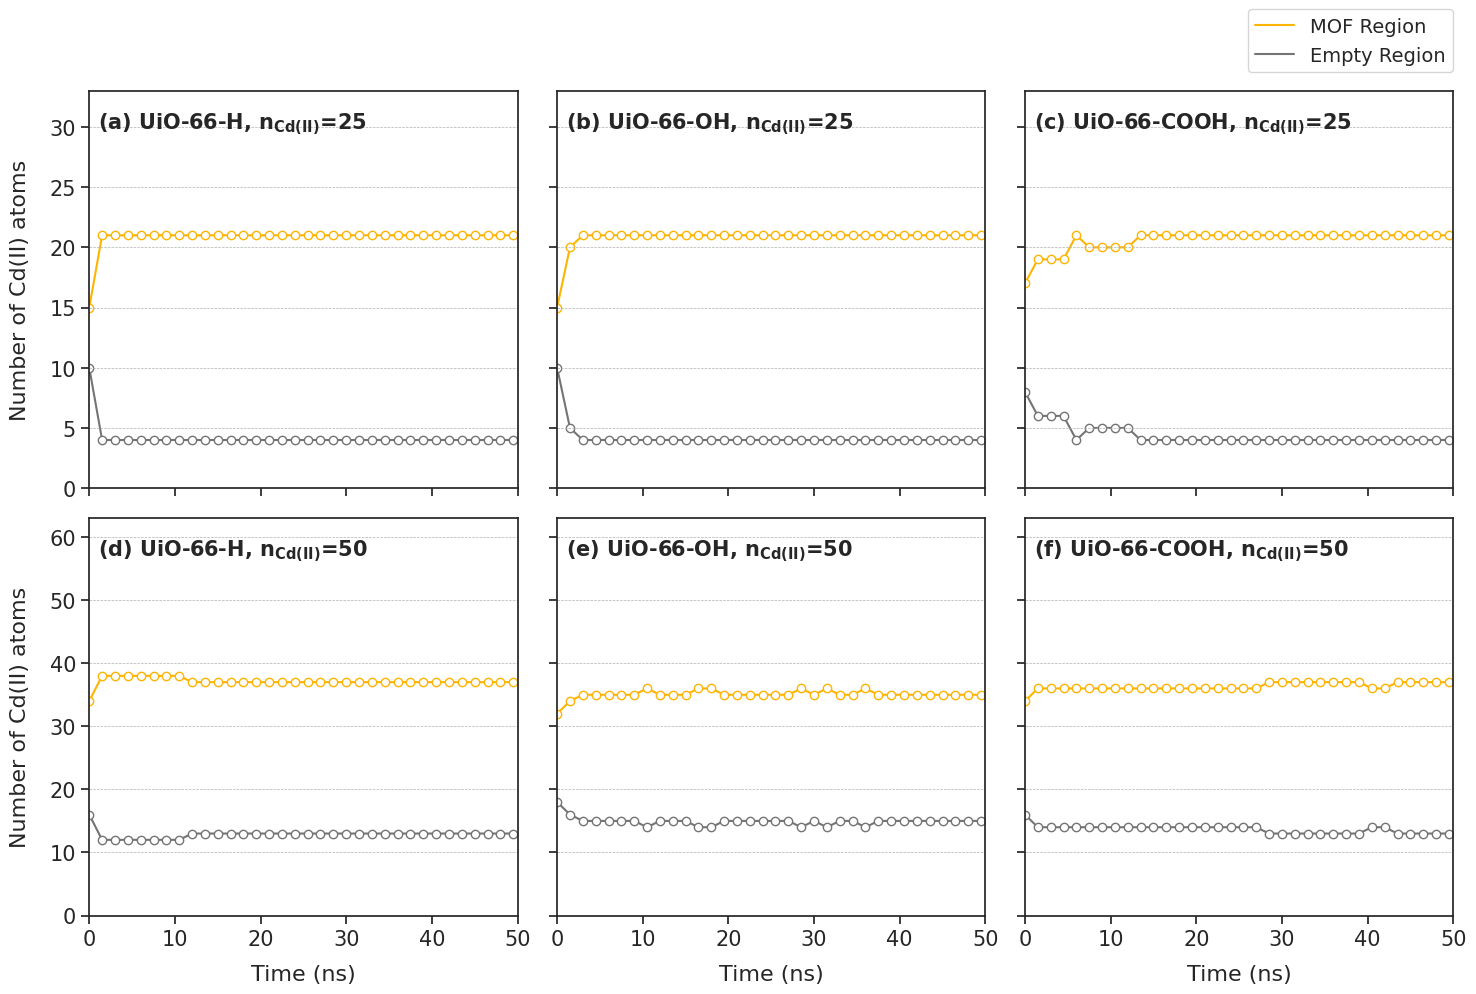

Figure saved to /home/josephzc/21Sept2024_data/0_fig/fig_cd_plots_h_oh_cooh_batch_1.png


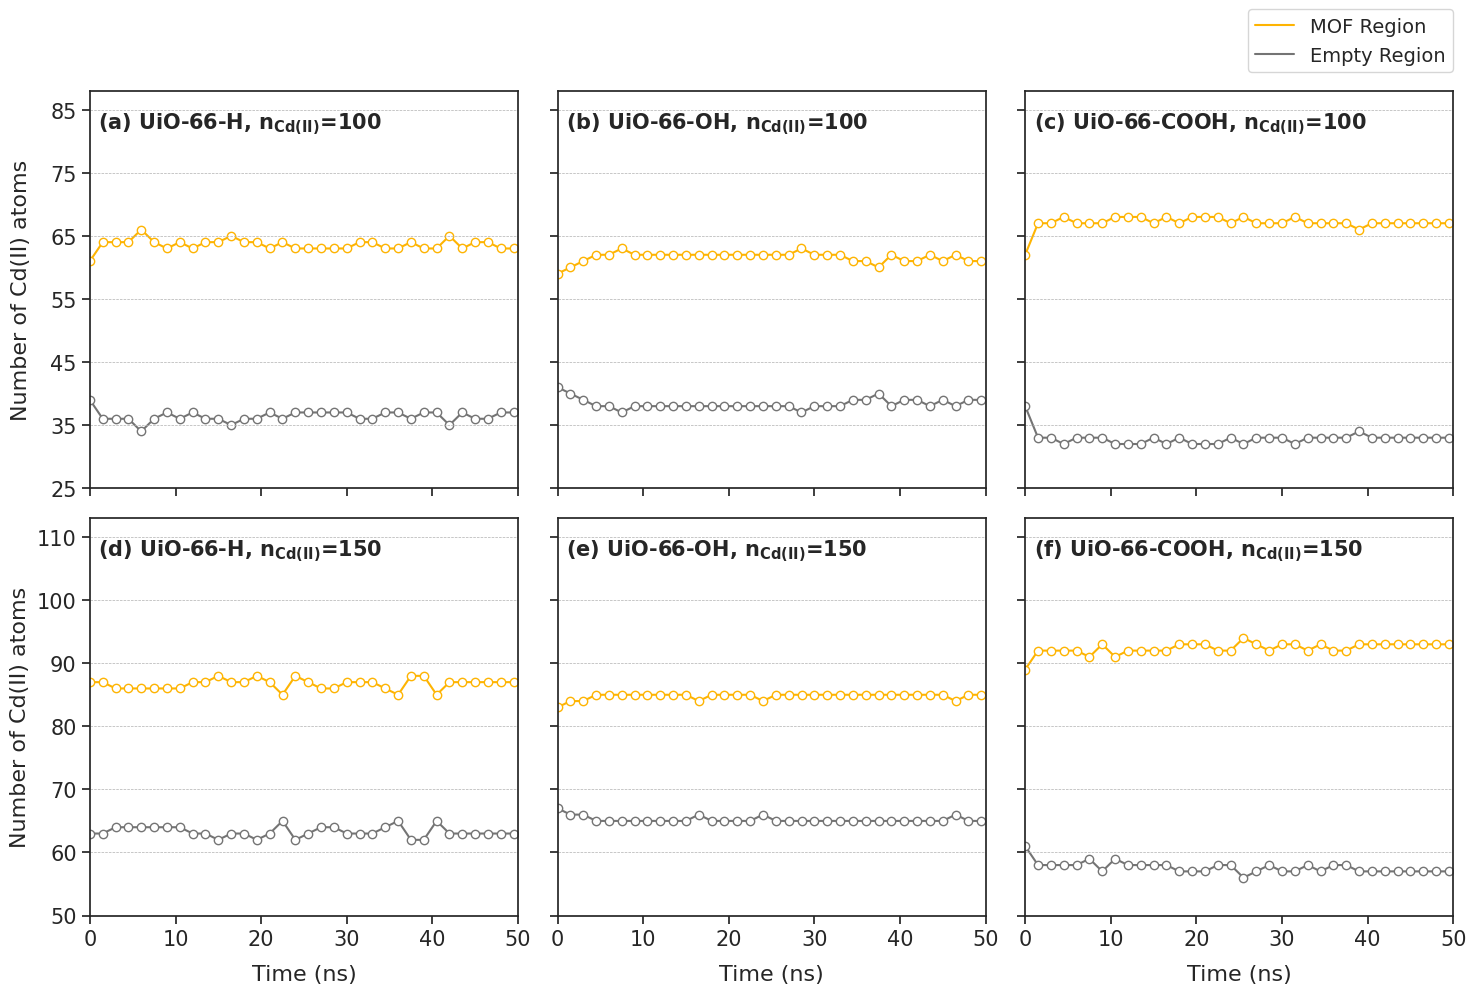

Figure saved to /home/josephzc/21Sept2024_data/0_fig/fig_cd_plots_h_oh_cooh_batch_2.png


In [2]:
# =======================================================
# 2️⃣ Percent Removal vs. Time (H, OH, COOH)
# =======================================================
# For plotting files with H, OH, and COOH
# 📅 Date Created: Sept 24, 2024
# 📅 Date Updated: Oct 23, 2024
# - interval points
# - separated into two figures
# - legend in upper right only
# - saves to a specific directory

import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import os

def read_and_plot(y_settings=None, filename_prefix="fig_cd_plots_h_oh_cooh", plot_interval=1, output_dir="."):
    if y_settings is None:
        y_settings = {
            0: {'y_min': 50, 'y_max': 110, 'yticks':[50, 60, 70, 80, 90, 100, 110], 'labelpad':7},
            1: {'y_min': 35, 'y_max': 75, 'yticks': [35, 45, 55, 65, 75], 'labelpad':9},
            2: {'y_min': 10, 'y_max': 50, 'yticks': [10, 20, 30, 40, 50], 'labelpad':11},
            3: {'y_min': 0, 'y_max': 25, 'yticks':  [0, 5, 10, 15, 20, 25], 'labelpad':13}
        }

    # Collect all files that have H, OH, and COO in their names
    files = glob.glob('*H_merged_rep_dyn.txt') + glob.glob('*OH_merged_rep_dyn.txt') + glob.glob('*COO_merged_rep_dyn.txt')

    # Labels for each plot
    labels = [
        '(a) UiO-66-H, n$_{\\mathbf{Cd(II)}}$=25',   '(b) UiO-66-OH, n$_{\\mathbf{Cd(II)}}$=25',   '(c) UiO-66-COOH, n$_{\\mathbf{Cd(II)}}$=25',
        '(d) UiO-66-H, n$_{\\mathbf{Cd(II)}}$=50',   '(e) UiO-66-OH, n$_{\\mathbf{Cd(II)}}$=50',   '(f) UiO-66-COOH, n$_{\\mathbf{Cd(II)}}$=50',
        '(a) UiO-66-H, n$_{\\mathbf{Cd(II)}}$=100',  '(b) UiO-66-OH, n$_{\\mathbf{Cd(II)}}$=100',  '(c) UiO-66-COOH, n$_{\\mathbf{Cd(II)}}$=100',
        '(d) UiO-66-H, n$_{\\mathbf{Cd(II)}}$=150',  '(e) UiO-66-OH, n$_{\\mathbf{Cd(II)}}$=150',  '(f) UiO-66-COOH, n$_{\\mathbf{Cd(II)}}$=150'
    ]

    # Order of concentrations (rows) for the files
    cd_concentrations = [25, 50, 100, 150]

    # Column groups for H, OH, COOH in the specified order
    functional_groups = ['H', 'OH', 'COO']  # 'COO' corresponds to 'COOH'

    # We will loop twice, once for each set of 6 subplots
    for batch in range(2):
        fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey='row')

        # Adjust the plot index for the batch
        plot_index = batch * 6  # Start from 0 for the first batch, 6 for the second

        # Iterate through rows (cd concentrations) and columns (H, OH, COOH)
        for i in range(2):  # Only 2 rows per batch
            actual_row = batch * 2 + i
            row_settings = y_settings[actual_row]
            labelpad = row_settings.get('labelpad', 7)

            for j, fg in enumerate(functional_groups):
                # Filter files for current concentration and functional group
                cd = cd_concentrations[actual_row]
                file_list = [f for f in files if f'cd{cd}' in f and f'uio66-{fg}_merged_rep_dyn.txt' in f]
                ax = axs[i, j]

                if file_list:
                    file = file_list[0]
                    try:
                        # Read the data with headers
                        df = pd.read_csv(file, delim_whitespace=True)

                        # Convert relevant columns to numeric types
                        df['step'] = pd.to_numeric(df['step'], errors='coerce') / 1e6  # Convert to ns
                        df['cd_in-box'] = pd.to_numeric(df['cd_in-box'], errors='coerce')
                        df['cd_in-solv'] = pd.to_numeric(df['cd_in-solv'], errors='coerce')

                        # Subset data based on plot_interval
                        df_subset = df[::plot_interval]

                        # Line plot using seaborn
                        sns.lineplot(x='step', y='cd_in-box', data=df_subset, ax=ax, label="MOF Region", color='#FEB402', zorder=1)
                        sns.lineplot(x='step', y='cd_in-solv', data=df_subset, ax=ax, label="Empty Region", color='#747474', zorder=1)

                        # Scatter plot with white face color and edge color matching the line
                        ax.scatter(df_subset['step'], df_subset['cd_in-box'], facecolor='white', edgecolor='#FEB402', zorder=2)
                        ax.scatter(df_subset['step'], df_subset['cd_in-solv'], facecolor='white', edgecolor='#747474', zorder=2)

                        # Set the y-axis label only for leftmost plots with individual labelpad
                        if j == 0:
                            ax.set_ylabel('Number of Cd(II) atoms', fontsize=16, labelpad=labelpad)
                        else:
                            ax.set_ylabel('')  # No y-axis label for non-leftmost plots

                        # Set x-axis label only for second row in each batch
                        if i == 1:
                            ax.set_xlabel('Time (ns)', fontsize=16, labelpad=11)
                        else:
                            ax.set_xlabel('')  # No x-axis label for other plots

                        # Set y-axis limits and ticks
                        ax.set_ylim(row_settings['y_min'], row_settings['y_max'])  # Set y-axis limits
                        ax.set_xlim(0, 50)  # Set x-axis limits
                        ax.tick_params(axis='both', which='major', labelsize=15)
                        ax.set_yticks(row_settings['yticks'])  # Set custom y-ticks

                        # Add the legend only for the rightmost plot in the first row
                        if i == 0 and j == 2:
                            ax.legend(loc='upper center', bbox_to_anchor=(0.76, 1.23), fontsize=14)
                        else:
                            ax.legend().set_visible(False)

                        # Set number of ticks to 5 on x-axis
                        ax.xaxis.set_major_locator(MaxNLocator(5))

                        # Draw horizontal dashed lines at y-ticks
                        for y in row_settings['yticks']:
                            ax.axhline(y=y, color='#b1b1b1', linestyle='--', linewidth=0.5)

                        # Add the subplot label (a), (b), ..., (l)
                        ax.text(0.02, 0.95, labels[plot_index], transform=ax.transAxes,
                                fontsize=15, verticalalignment='top', fontweight='bold')
                        plot_index += 1

                    except Exception as e:
                        print(f"Error reading file {file}: {e}")
                else:
                    # If no file is found, hide the axis
                    ax.set_visible(False)

        # Adjust layout and save figure
        plt.tight_layout()
        
        # Construct the save path for each batch
        save_path = os.path.join(output_dir, f"{filename_prefix}_batch_{batch+1}.png")
        
        plt.show()
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figure saved to {save_path}")

# Call Script
if __name__ == "__main__":
    # Updated y-axis settings and labelpads
    y_settings = {
        3: {'y_min': 50, 'y_max': 113, 'yticks':[50, 60, 70, 80, 90, 100, 110], 'labelpad':5},   
        2: {'y_min': 35, 'y_max': 88, 'yticks': [25, 35, 45, 55, 65, 75, 85], 'labelpad':14},     
        1: {'y_min': 10, 'y_max': 63, 'yticks': [0, 10, 20, 30, 40, 50, 60], 'labelpad':14},     
        0: {'y_min': 0, 'y_max': 33, 'yticks':  [0, 5, 10, 15, 20, 25, 30], 'labelpad':14}       
    }
    
    # Variables for output directory and filename prefix
    output_dir = '/home/josephzc/21Sept2024_data/0_fig/'  # Replace with the desired directory
    filename_prefix = "fig_cd_plots_h_oh_cooh"

    # Pass plot_interval to control data points plotted
    read_and_plot(y_settings=y_settings, filename_prefix=filename_prefix, plot_interval=300, output_dir=output_dir)


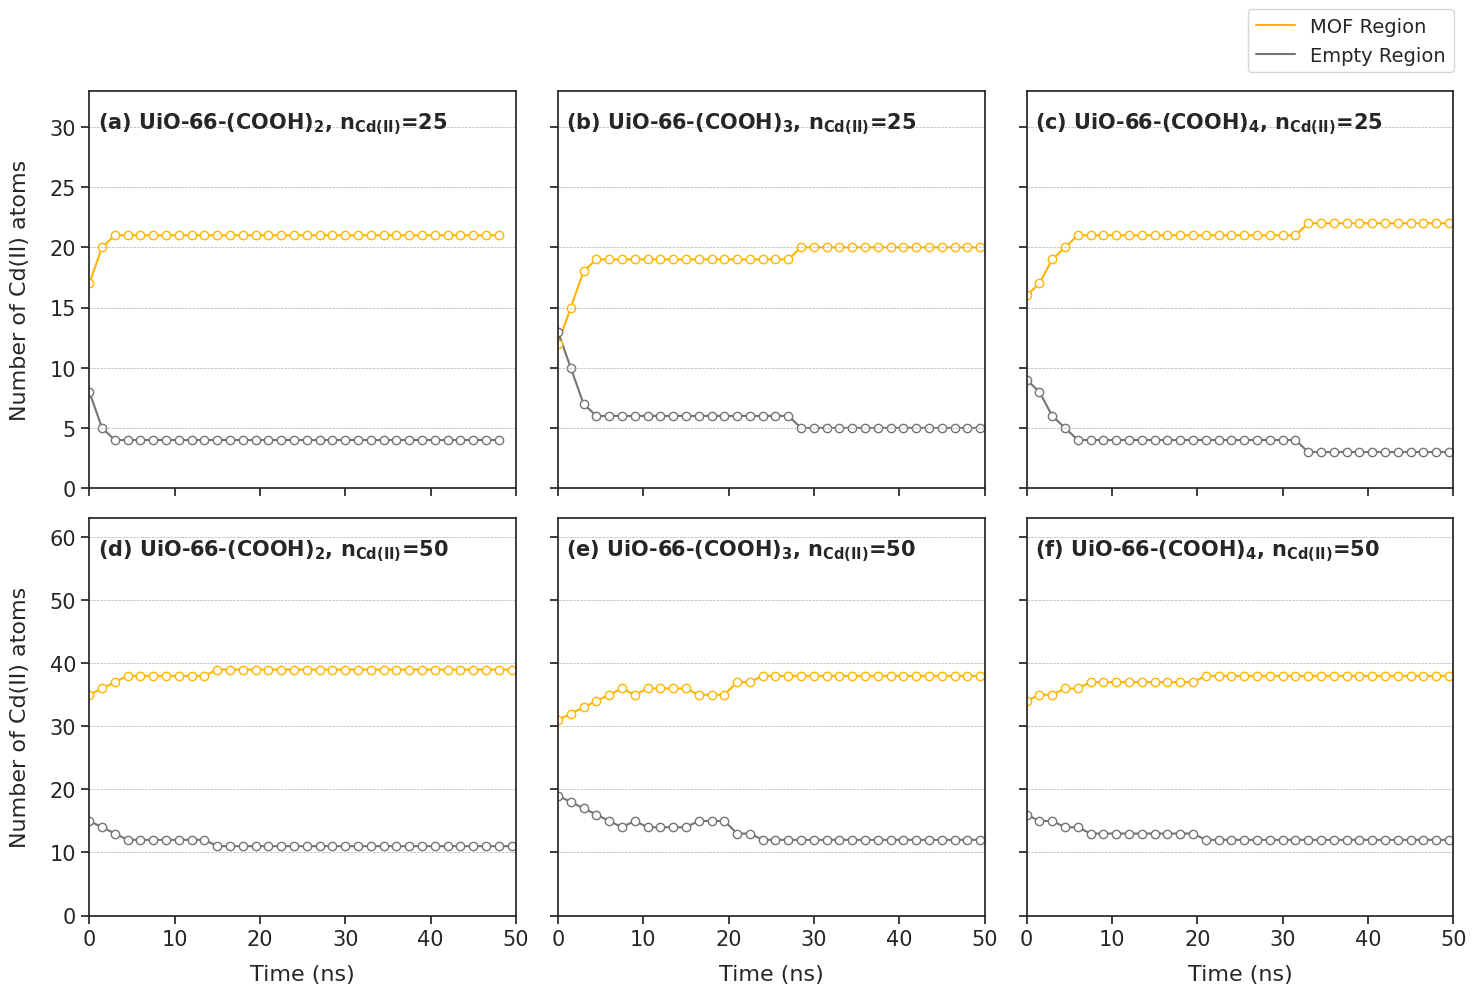

Figure saved to /home/josephzc/21Sept2024_data/0_fig/fig_cd_plots_coo_batch_1.png


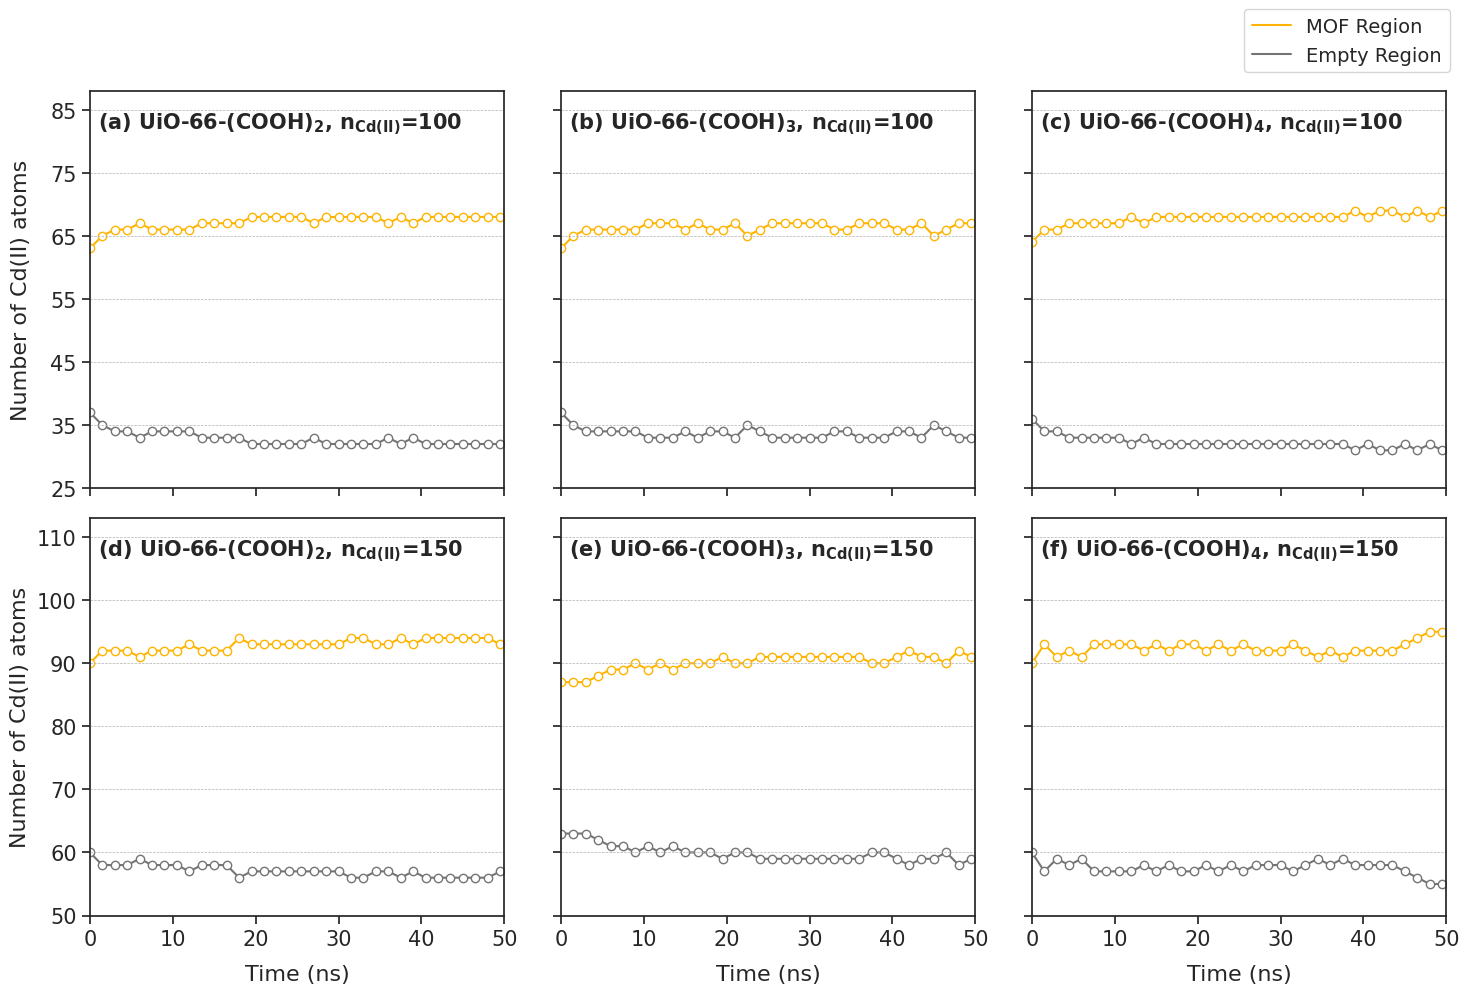

Figure saved to /home/josephzc/21Sept2024_data/0_fig/fig_cd_plots_coo_batch_2.png


In [3]:
# =======================================================
# 3️⃣ Percent Removal vs. Time (COOH_2, COOH_3, COOH_4)
# =======================================================
# 📅 Date Created: Sept 24, 2024
# 📅 Date Updated: Oct 23, 2024
# - interval points
# - separated into two figures
# - legend in upper right only
# - saves to a specific directory

import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import os

def read_and_plot(y_settings=None, filename_prefix="fig_cd_plots", plot_interval=1, output_dir="."):
    if y_settings is None:
        y_settings = {
            0: {'y_min': 50, 'y_max': 110, 'yticks':[50, 60, 70, 80, 90, 100, 110], 'labelpad':7},
            1: {'y_min': 35, 'y_max': 75, 'yticks': [35, 45, 55, 65, 75], 'labelpad':9},
            2: {'y_min': 10, 'y_max': 50, 'yticks': [10, 20, 30, 40, 50], 'labelpad':11},
            3: {'y_min': 0, 'y_max': 25, 'yticks':  [0, 5, 10, 15, 20, 25], 'labelpad':13}
        }

    # Collect all files that have COO2, COO3, and COO4 in their names
    files = glob.glob('*COO2*.txt') + glob.glob('*COO3*.txt') + glob.glob('*COO4*.txt')

    # Updated labels for both sets of images
    labels = [
        '(a) UiO-66-(COOH)$\\mathbf{_{2}}$, n$_{\\mathbf{Cd(II)}}$=25', '(b) UiO-66-(COOH)$\\mathbf{_{3}}$, n$_{\\mathbf{Cd(II)}}$=25', '(c) UiO-66-(COOH)$\\mathbf{_{4}}$, n$_{\\mathbf{Cd(II)}}$=25',
        '(d) UiO-66-(COOH)$\\mathbf{_{2}}$, n$_{\\mathbf{Cd(II)}}$=50', '(e) UiO-66-(COOH)$\\mathbf{_{3}}$, n$_{\\mathbf{Cd(II)}}$=50', '(f) UiO-66-(COOH)$\\mathbf{_{4}}$, n$_{\\mathbf{Cd(II)}}$=50',
        '(a) UiO-66-(COOH)$\\mathbf{_{2}}$, n$_{\\mathbf{Cd(II)}}$=100',  '(b) UiO-66-(COOH)$\\mathbf{_{3}}$, n$_{\\mathbf{Cd(II)}}$=100',  '(c) UiO-66-(COOH)$\\mathbf{_{4}}$, n$_{\\mathbf{Cd(II)}}$=100',
        '(d) UiO-66-(COOH)$\\mathbf{_{2}}$, n$_{\\mathbf{Cd(II)}}$=150',  '(e) UiO-66-(COOH)$\\mathbf{_{3}}$, n$_{\\mathbf{Cd(II)}}$=150',  '(f) UiO-66-(COOH)$\\mathbf{_{4}}$, n$_{\\mathbf{Cd(II)}}$=150'
    ]

    # Order of concentrations (rows) for the files
    cd_concentrations = [25, 50, 100, 150]

    # Column groups for COO2, COO3, COO4
    coo_groups = ['COO2', 'COO3', 'COO4']

    # We will loop twice, once for each set of 6 subplots
    for batch in range(2):
        fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey='row')

        # Adjust the plot index for the batch
        plot_index = batch * 6  # Start from 0 for the first batch, 6 for the second

        # Iterate through rows (cd concentrations) and columns (COO2, COO3, COO4)
        for i in range(2):  # Only 2 rows per batch
            actual_row = batch * 2 + i
            row_settings = y_settings[actual_row]
            labelpad = row_settings.get('labelpad', 7)

            for j, coo in enumerate(coo_groups):
                # Filter files for current concentration and COO group
                cd = cd_concentrations[actual_row]
                file_list = [f for f in files if f'cd{cd}' in f and coo in f]
                ax = axs[i, j]

                if file_list:
                    file = file_list[0]  # Use the first matching file
                    try:
                        # Read the data with headers
                        df = pd.read_csv(file, delim_whitespace=True)

                        # Convert relevant columns to numeric types
                        df['step'] = pd.to_numeric(df['step'], errors='coerce') / 1e6  # Convert to ns
                        df['cd_in-box'] = pd.to_numeric(df['cd_in-box'], errors='coerce')
                        df['cd_in-solv'] = pd.to_numeric(df['cd_in-solv'], errors='coerce')

                        # Subset data based on plot_interval
                        df_subset = df[::plot_interval]

                        # Line plot using seaborn
                        sns.lineplot(x='step', y='cd_in-box', data=df_subset, ax=ax, label="MOF Region", color='#FEB402', zorder=1)
                        sns.lineplot(x='step', y='cd_in-solv', data=df_subset, ax=ax, label="Empty Region", color='#747474', zorder=1)

                        # Scatter plot with white point color and edge color matching the line
                        ax.scatter(df_subset['step'], df_subset['cd_in-box'], facecolor='white', edgecolor='#FEB402', zorder=2)
                        ax.scatter(df_subset['step'], df_subset['cd_in-solv'], facecolor='white', edgecolor='#747474', zorder=2)

                        # Set the y-axis label only for leftmost plots
                        if j == 0:
                            ax.set_ylabel('Number of Cd(II) atoms', fontsize=16, labelpad=labelpad)
                        else:
                            ax.set_ylabel('')  # No y-axis label for non-leftmost plots

                        # Set x-axis label only for second row in each batch
                        if i == 1:
                            ax.set_xlabel('Time (ns)', fontsize=16, labelpad=11)
                        else:
                            ax.set_xlabel('')  # No x-axis label for other plots

                        # Set y-axis limits and ticks
                        ax.set_ylim(row_settings['y_min'], row_settings['y_max'])  # Set y-axis limits
                        ax.set_xlim(0, 50)  # Set x-axis limits
                        ax.tick_params(axis='both', which='major', labelsize=15)
                        ax.set_yticks(row_settings['yticks'])  # Set custom y-ticks

                        # Add the legend only for the rightmost plot in the first row
                        if i == 0 and j == 2:
                            ax.legend(loc='upper center', bbox_to_anchor=(0.76, 1.23), fontsize=14)
                        else:
                            ax.legend().set_visible(False)

                        # Set number of ticks to 5 on x-axis
                        ax.xaxis.set_major_locator(MaxNLocator(5))

                        # Draw horizontal dashed lines at y-ticks
                        for y in row_settings['yticks']:
                            ax.axhline(y=y, color='#b1b1b1', linestyle='--', linewidth=0.5)

                        # Add the subplot label (a), (b), ..., (f) and (g), (h), ..., (l)
                        ax.text(0.02, 0.95, labels[plot_index], transform=ax.transAxes,
                                fontsize=15, verticalalignment='top', fontweight='bold')
                        plot_index += 1

                    except Exception as e:
                        print(f"Error reading file {file}: {e}")
                else:
                    # If no file is found, hide the axis
                    ax.set_visible(False)

        # Adjust layout and save figure
        plt.tight_layout()
        
        # Construct the save path for each batch
        save_path = os.path.join(output_dir, f"{filename_prefix}_batch_{batch+1}.png")
        
        plt.show()
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figure saved to {save_path}")

# Call Script
if __name__ == "__main__":
    y_settings = {
        3: {'y_min': 50, 'y_max': 113, 'yticks':[50, 60, 70, 80, 90, 100, 110], 'labelpad':5},   
        2: {'y_min': 35, 'y_max': 88, 'yticks': [25, 35, 45, 55, 65, 75, 85], 'labelpad':14},     
        1: {'y_min': 10, 'y_max': 63, 'yticks': [0, 10, 20, 30, 40, 50, 60], 'labelpad':14},     
        0: {'y_min': 0, 'y_max': 33, 'yticks':  [0, 5, 10, 15, 20, 25, 30], 'labelpad':14}       
    }

    # Variables for output directory and filename prefix
    output_dir = '/home/josephzc/21Sept2024_data/0_fig/'  # Replace with the desired directory
    filename_prefix = "fig_cd_plots_coo"

    # Pass plot_interval to control data points plotted
    read_and_plot(y_settings=y_settings, filename_prefix=filename_prefix, plot_interval=300, output_dir=output_dir)


/tmp/ipykernel_15512/2731660289.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_mapping[i].set_xticklabels(mof_order, rotation=45, ha='right', fontsize=14)
/tmp/ipykernel_15512/2731660289.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_mapping[i].set_xticklabels(mof_order, rotation=45, ha='right', fontsize=14)
/tmp/ipykernel_15512/2731660289.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_mapping[i].set_xticklabels(mof_order, rotation=45, ha='right', fontsize=14)
/tmp/ipykernel_15512/2731660289.py:115: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_mapping[i].set_xticklabels(mof_order, rotation=45, ha='right', fontsize=14)


Figure saved to /home/josephzc/21Sept2024_data/0_fig/fig_percent_removal_h2o_cooh_variants.png


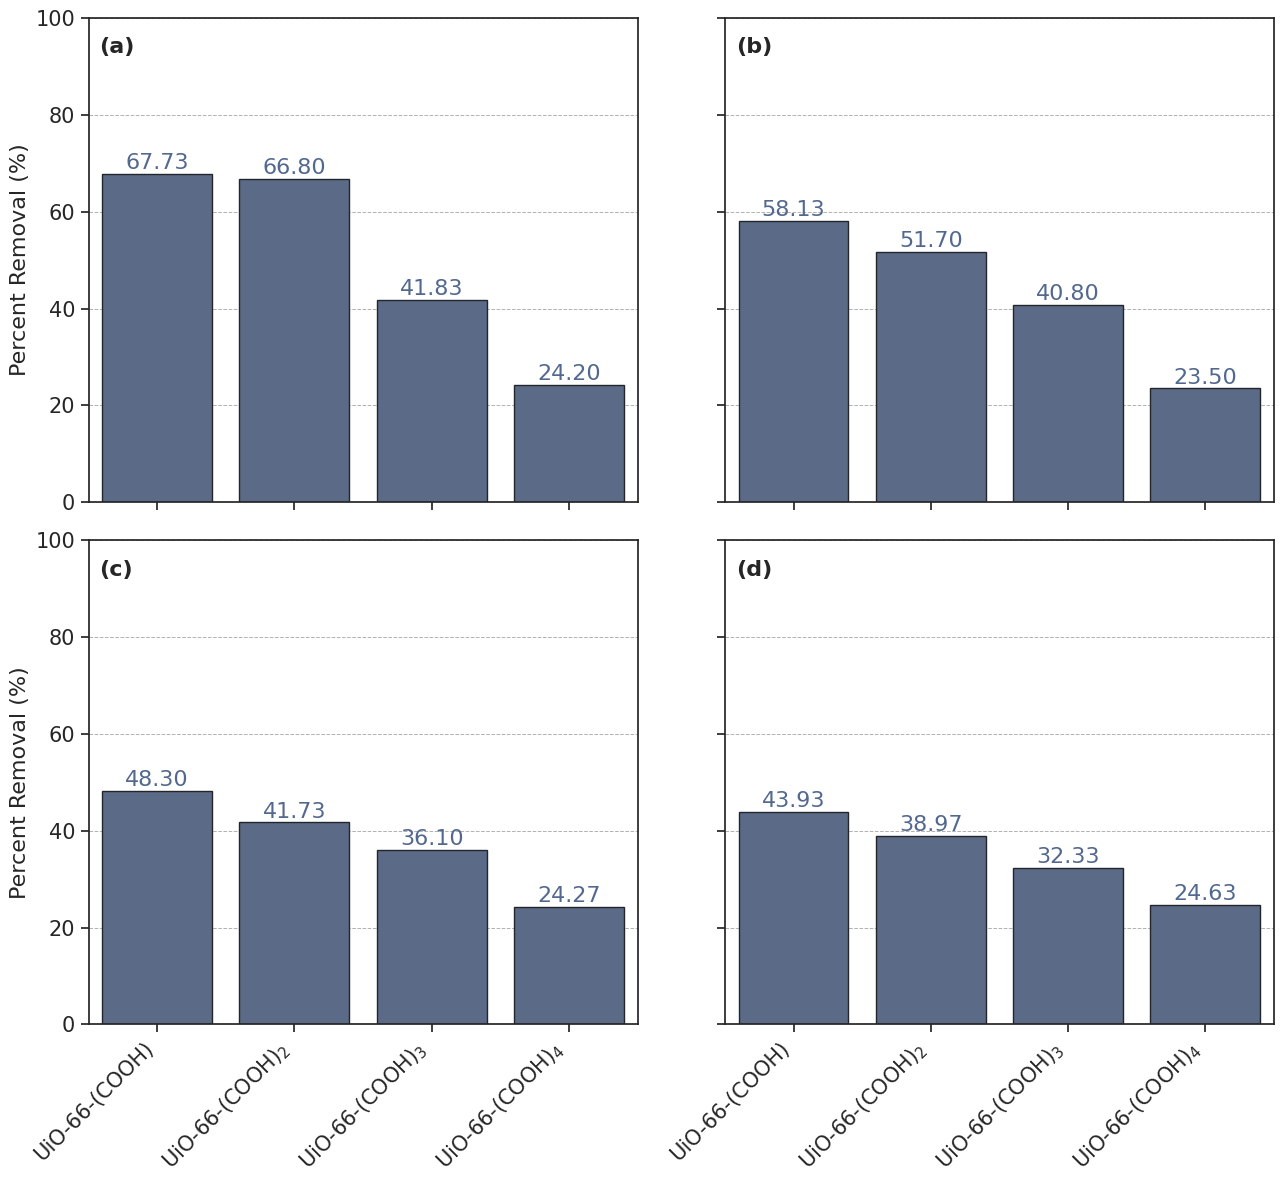

In [5]:
# =======================================================
# 4️⃣ Percent Removal of Water
# =======================================================
# 📅 Date Created: Sept 24, 2024
# 📅 Date Updated: Oct 23, 2024
# - reformatted
# - saves to a specific directory

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

pd.set_option('display.width', 1000)

# Function to create h2o_table DataFrame from data files
def create_h2o_table():
    # Define total Cd(II) concentrations and MOF types
    total_cd_values = [25, 50, 100, 150]
    mof_types = ['COO', 'COO2', 'COO3', 'COO4']  # Corresponds to UiO-66-(COOH), UiO-66-(COOH)2, etc.
    h2o_table = []
    total_h2o = 3000  # Total H2O is constant for all cases

    # Map mof_types to labels for plotting
    mof_labels = {
        'COO': 'UiO-66-(COOH)',
        'COO2': 'UiO-66-(COOH)$_2$',
        'COO3': 'UiO-66-(COOH)$_3$',
        'COO4': 'UiO-66-(COOH)$_4$'
    }

    for total_cd in total_cd_values:
        for mof in mof_types:
            # Construct the filename pattern
            pattern = f'cd{total_cd}_uio66-{mof}_merged_rep_dyn.txt'
            files = glob.glob(pattern)
            if not files:
                print(f"No file found for total_cd={total_cd}, mof={mof}")
                continue
            file = files[0]  # Assuming one file per combination
            try:
                # Read the data file
                df = pd.read_csv(file, delim_whitespace=True)
                # Convert relevant columns to numeric
                df['h2o_in-box'] = pd.to_numeric(df['h2o_in-box'], errors='coerce')

                # Get the last 1000 values and take the maximum
                last_1000_values = df['h2o_in-box'].iloc[-1000:]
                max_adsorbed_h2o = last_1000_values.max()

                # Compute percent removal based on 'h2o_in-box'
                percent_removal = (max_adsorbed_h2o / total_h2o) * 100

                # Append to h2o_table
                h2o_table.append({
                    'mof': mof_labels[mof],
                    'total_cd': total_cd,
                    'adsorbed_h2o': max_adsorbed_h2o,
                    'percent_removal': percent_removal
                })
            except Exception as e:
                print(f"Error processing file {file}: {e}")

    # Convert to DataFrame with specified column order
    h2o_table_df = pd.DataFrame(h2o_table, columns=['mof', 'total_cd', 'adsorbed_h2o', 'percent_removal'])
    return h2o_table_df

# Function to create a seaborn barplot from the h2o_table DataFrame
def plot_h2o_removal(h2o_table, output_dir, filename):
    # Define the unique total_cd values in ascending order (25, 50, 100, 150)
    total_cd_values = sorted(h2o_table['total_cd'].unique())

    # Create a subplot with 2 rows and 2 columns (for 4 total_cd values)
    fig, axs = plt.subplots(2, 2, figsize=(13, 12), sharex=False, sharey=False)

    # Set Seaborn theme
    sns.set_theme(style="ticks", palette="colorblind")
    color = '#52688f'  # Dark gray color for bars
    color_text = '#52688f'

    # Mapping the subplots manually (top-left, top-right, bottom-left, bottom-right)
    ax_mapping = {0: axs[0, 0], 1: axs[0, 1], 2: axs[1, 0], 3: axs[1, 1]}

    # Define the order of MOFs for consistent plotting
    mof_order = ['UiO-66-(COOH)', 'UiO-66-(COOH)$_2$', 'UiO-66-(COOH)$_3$', 'UiO-66-(COOH)$_4$']

    # Iterate over the total_cd values and create a barplot for each
    for i, total_cd in enumerate(total_cd_values):
        # Subset the table for the current total_cd
        subset = h2o_table[h2o_table['total_cd'] == total_cd]

        # Plot the barplot on the respective axis
        sns.barplot(
            x='mof', y='percent_removal', data=subset, ax=ax_mapping[i],
            order=mof_order, color=color, edgecolor='#22262a'
        )

        # Add text annotations
        ax_mapping[i].text(
            0.02, 0.96, f'({chr(97 + i)})', transform=ax_mapping[i].transAxes,
            fontsize=16, verticalalignment='top', horizontalalignment='left',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.5), fontweight='bold'
        )

        for p in ax_mapping[i].patches:
            height = p.get_height()
            ax_mapping[i].text(
                p.get_x() + p.get_width() / 2., height + 1, '{:.2f}'.format(height),
                ha='center', color=color_text, fontsize=16
            )

        # Set labels and ticks
        ax_mapping[i].set_xlabel('')
        ax_mapping[i].set_xticklabels(mof_order, rotation=45, ha='right', fontsize=14)
        ax_mapping[i].set_ylim(0, 100)
        ax_mapping[i].set_yticks([0, 20, 40, 60, 80, 100])
        ax_mapping[i].tick_params(axis='both', labelsize=15)

        # Only set y-label for the leftmost subplots (column 1)
        if i % 2 == 0:
            ax_mapping[i].set_ylabel('Percent Removal (%)', fontsize=16)
        else:
            ax_mapping[i].set_ylabel('')
            ax_mapping[i].set_yticklabels([])

        # Hide x-ticks and x-label for the first row
        if i < 2:
            ax_mapping[i].set_xticklabels([])
            ax_mapping[i].set_xlabel('')

        # Add horizontal grid lines
        ax_mapping[i].grid(True, axis='y', linestyle='--', color='#b1b1b1', linewidth=0.7)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Save the figure as PNG
    save_path = os.path.join(output_dir, filename)
    fig.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Figure saved to {save_path}")

    # Display the plot
    plt.show()

# Call Script
if __name__ == "__main__":
    # Variables for saving the plot
    output_dir = '/home/josephzc/21Sept2024_data/0_fig/'  # Replace with the desired directory
    filename = 'fig_percent_removal_h2o_cooh_variants.png'

    # Plot the data and save the figure
    plot_h2o_removal(h2o_table, output_dir, filename)
